# Importing Data

This Covid-19 publications data was imported from the National Institutes of Health iCite database on August 06, 2020. The data consists of 36103 Peer Review articles from PubMed, 5785 articles from medRxiv, 1974 from SSRN, 2459 from Research Square, 1627 from bioRxiv, 1745 from arXiv, and 338 from ChemRxiv and thus a total of 50031 articles on Covid-19.

In [1]:
#### Preliminaries Libraries
import pandas as pd
import numpy as np
import re # regex 
from pprint import pprint

In [2]:
#### Check my system environment
import sys
sys.executable

'C:\\Users\\messanks\\AppData\\Local\\Continuum\\anaconda3\\envs\\myenv\\python.exe'

In [3]:
#### Read in the COVID19 data
data = pd.read_csv('NIH_iCite_COVID19_08062020.csv', encoding='latin1')

In [4]:
#### check my data column names
print(data.columns)

Index(['DOI', 'PMCID', 'PMID', 'Pub Year', 'Publication Date', 'Source',
       'Title', 'Abstract', 'Condition', 'Chemicals & Drugs', 'Target',
       'Devices', 'Full Author Affiliation', 'First Author', 'Journal Name',
       'Journal Name Full'],
      dtype='object')


In [5]:
#### Drop duplicates

## select data with doi and drop their duplicates
data_with_doi = data.dropna(subset = ['DOI']).drop_duplicates(subset=['DOI'])

## select data without doi and drop their duplicates by title
data_no_doi = (data[data['DOI'].isnull()]).drop_duplicates(subset=['Title'])

### concatenate both the data with and without doi
all_data = pd.concat([data_with_doi, data_no_doi])

In [6]:
#### Concatenate title, abstract, Chemicals & Drugs

def merge_columns(dataset):
    # dataset is the entire dataframe
    
    n_dat = len(dataset)
    text = list(np.zeros(n_dat)) # initialize empty column
    
    ## select some columns to include in the new dataset
    doi = all_data.iloc[:,0]
    #year = all_data.iloc[:,3]
    date = all_data.iloc[:,4]
    source = all_data.iloc[:,5]
    journal = all_data.iloc[:,15]
    title = all_data.iloc[:,6]
    abstract = all_data.iloc[:,7]
    drug = all_data.iloc[:,9]
    device = all_data.iloc[:,11]
    
    ## Create a new dataset by combining the columsn                
    new_dataset = pd.DataFrame({'doi':doi,'date':date,'source':source,'journal':journal,
                                'title':title,'abstract':abstract,'drug':drug,'device':device})
    ## add new concatenated column
    new_dataset['text'] = new_dataset[['title','abstract','drug']].fillna('').agg('.'.join, axis=1)
    return new_dataset.reset_index(drop=True)

pub_data = merge_columns(all_data)

In [7]:
pub_data.head(2)

doi        date           source journal  \
0  10.21203/rs.3.rs-52214/v1  2020-08-05  Research Square     NaN   
1  10.21203/rs.3.rs-53271/v1  2020-08-05  Research Square     NaN   

                                               title  \
0  Covid-19-associated coagulopathy (CoAC): throm...   
1  Diplopia from abducens nerve paresis as a pres...   

                                            abstract  \
0  Background: COVID-19 associated coagulopathy i...   
1  Neurological manifestations of COVID-19 are no...   

                                                drug    device  \
0  Alteplase;Dimer;Prothrombin;Thrombin;Thrombopl...  Thrombin   
1                                                NaN       NaN   

                                                text  
0  Covid-19-associated coagulopathy (CoAC): throm...  
1  Diplopia from abducens nerve paresis as a pres...

# Data preprocessing 

## Language Detection 

We use langdetect to detect languages within the dataset. See [langdetect documentation](https://pypi.org/project/langdetect/) for information regarding this package and [wiki page](https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes) to determine what each ISO code means (i.e. "en" for english). This a non-deterministic algorithm that use Naive Bayse approach with character n-gram to detect the language of a text. 

In [8]:
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory

# set seed
DetectorFactory.seed = 50

# to store the languages
languages = []

# loop to go through each document 
for k in tqdm(range(0,len(pub_data))):
    doc = pub_data.iloc[k]['text'].split()
    
    lang = "en" # initialize language denoted as lang
    
    # select on the first 100 tokens if doc has more than 100 token
    try:
        if len(doc) > 100:
            lang = detect(" ".join(doc[:100]))
        elif len(doc) <= 100:
            lang = detect(" ".join(doc[:len(doc)]))
    
    # Use unknown if no language is found
    except Exception as error:
        lang = "unknown"
        pass   
    # get the language    
    languages.append(lang)

100%|██████████| 49582/49582 [05:24<00:00, 152.61it/s]


In [9]:
## Assign the languages to the ISO codes

lang_long = list([0] * len(languages))

## Write the full name of the languages
for index, word in enumerate(languages):
    if word == 'en':
        lang_long[index] = 'English'
    elif word == 'es':
        lang_long[index] = 'Spanish'
    elif word == 'pt':
        lang_long[index] = 'Portuguese'
    elif word == 'lt':
        lang_long[index] = 'Lithuanian'
    elif word == 'hu':
        lang_long[index] = 'Hungarian'
    elif word == 'da':
        lang_long[index] = 'Danish'
    elif word == 'sw':
        lang_long[index] = 'Swahili'
    elif word == 'ro':
        lang_long[index] = 'Romanian'
    elif word == 'af':
        lang_long[index] = 'Afrikaans'
    elif word == 'de':
        lang_long[index] = 'German'
    elif  word == 'id':
        lang_long[index] = 'Indonesian'
    elif word == 'tr':
        lang_long[index] = 'Turkish'
    elif word == 'sv':
        lang_long[index] = 'Swedish'
    elif word == 'et':
        lang_long[index] = 'Estonian'
    elif word == 'sl':
        lang_long[index] = 'Slovenian'
    elif word == 'fr':
        lang_long[index] = 'French'
    elif word == 'ca':
        lang_long[index] = 'Catalan'
    elif word == 'vi':
        lang_long[index] = 'Vietnamese'
    elif word == 'tl':
        lang_long[index] = 'Tagalog'
    elif word == 'it':
        lang_long[index] = 'Italian'
    elif word == 'nl':
        lang_long[index] = 'Dutch'
    elif word == 'pl':
        lang_long[index] = 'Polish'
    else:
        lang_long[index] = 'Unknown'
        
languages_dict = {}
for lang in set(lang_long):
    languages_dict[lang] = lang_long.count(lang)

## add the languages to the dataframe
pub_data['language'] = lang_long
print("Total: {}\n".format(len(languages)))

## order the dictionary in ascending order by the frequencies
languages_dict = sorted(languages_dict.items(), key = lambda x: x[1], reverse = False)
## Convert back to dictionary
languages_dict = {languages_dict[i][0]: languages_dict[i][1] for i in range(0, len(languages_dict))} 
print(languages_dict)

Total: 49582

{'Polish': 1, 'Slovenian': 1, 'Vietnamese': 1, 'Hungarian': 2, 'Lithuanian': 2, 'Swedish': 3, 'Afrikaans': 4, 'Romanian': 8, 'Tagalog': 8, 'Dutch': 10, 'Portuguese': 13, 'Unknown': 15, 'Danish': 20, 'Catalan': 22, 'Indonesian': 22, 'Italian': 36, 'German': 124, 'French': 159, 'Spanish': 183, 'English': 48948}


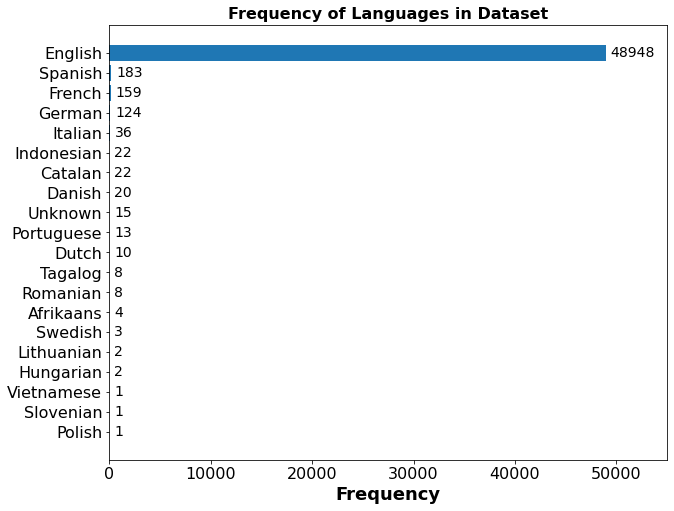

In [10]:
## Plot the language
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
plt.barh(range(len(languages_dict)), list(languages_dict.values()), align='center')
plt.xlim(0, 55000)
plt.yticks(range(len(languages_dict)), list(languages_dict.keys()), fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlabel('Frequency', fontsize = 18, fontweight = 'bold')
plt.title("Frequency of Languages in Dataset", fontdict = {'fontsize': 16, 'fontweight': 'bold'})

pos =  np.arange(len(languages_dict))

# Text on the top of each barplot
for i in range(len(languages_dict)):
    plt.text(x = list(languages_dict.values())[i] + 500, y = pos[i] - 0.2 ,
             s = list(languages_dict.values())[i], size = 14)
        
plt.show()

In [11]:
pub_data_french = pub_data[pub_data['language'] == 'French'] 
pub_data_french.head(3)

doi        date                  source  \
1191                10.1136/bmj.m3018  2020-08-02  Peer reviewed (PubMed)   
4023            10.3917/spub.201.0005  2020-07-25  Peer reviewed (PubMed)   
5992  10.1136/practneurol-2020-002689  2020-07-19  Peer reviewed (PubMed)   

                                            journal  \
1191                    BMJ (Clinical research ed.)   
4023  Sante publique (Vandoeuvre-les-Nancy, France)   
5992                            Practical neurology   

                                                  title abstract drug device  \
1191             Cellular immune responses to covid-19.      NaN  NaN    NaN   
4023  La santé publique en France à lépreuve de la ...      NaN  NaN    NaN   
5992                                 COVID-19 response.      NaN  NaN    NaN   

                                                   text language  
1191           Cellular immune responses to covid-19...   French  
4023  La santé publique en France à lépreuve de la ...   French  
5992                               COVID-19 response...   French

In [12]:
pub_data = pub_data[pub_data['language'] == 'English'] 
pub_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48948 entries, 0 to 49581
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   doi       46496 non-null  object
 1   date      48948 non-null  object
 2   source    48948 non-null  object
 3   journal   35095 non-null  object
 4   title     48947 non-null  object
 5   abstract  40868 non-null  object
 6   drug      14828 non-null  object
 7   device    12310 non-null  object
 8   text      48948 non-null  object
 9   language  48948 non-null  object
dtypes: object(10)
memory usage: 4.1+ MB


## Text Cleaning 

Now we remove punctuations and stop words (i.e. common words such as "and", "seem", etc.) and conduct lemmatization using the Spacy package. see the documentation of the package [here](https://spacy.io/usage) for more information.

In [13]:
# # Download the spacy bio parser
# ## May take a couple minutes to run

# from IPython.utils import io
# with io.capture_output() as captured:
#     !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.5/en_core_sci_lg-0.2.5.tar.gz

In [14]:
#### NLP spacy packages

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_sci_lg  
from spacy.tokenizer import Tokenizer

In [15]:
import string

#### Parser or tokenizer

### Customizing spaCy’s Tokenizer class 
### from https://spacy.io/usage/linguistic-features#native-tokenizers
special_cases = {":)": [{"ORTH": ":)"}]}
prefix_re = re.compile(r'''^[[("']''')
suffix_re = re.compile(r'''[])"']$''')
infix_re = re.compile(r'''[~]''')
simple_url_re = re.compile(r'''^https?://''')

def custom_tokenizer(parser):
    return Tokenizer(parser.vocab, rules=special_cases,
                                prefix_search=prefix_re.search,
                                suffix_search=suffix_re.search,
                                infix_finditer=infix_re.finditer,
                                token_match=simple_url_re.match)


parser = en_core_sci_lg.load(disable=["tagger", "ner"])

## Add additional stopwords
parser.Defaults.stop_words |= {'2019','covid','covid-19','sars-cov-2','coronavirus','sars','severe',
                               'acute','respiratory','syndrome','doi','https','novel', 'org',
                               'article','10','1016','et','al','2020','95','ci','confidence','interval', 
                               '95 ci','95 confidence interval'}
stopwords = list(STOP_WORDS)
punctuations = string.punctuation

parser.max_length = 8000000
parser.tokenizer = custom_tokenizer(parser)

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

<ipython-input-15-0b65b58b09c6>:8: FutureWarning: Possible nested set at position 2
  prefix_re = re.compile(r'''^[[("']''')


In [16]:
tqdm.pandas()
pub_data["processed_text"] = pub_data["text"].progress_apply(spacy_tokenizer)

C:\Users\messanks\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 48948/48948 [20:05<00:00, 40.60it/s]  


In [17]:
#### Convert the date to date structure
pub_data['date'] = pd.to_datetime(pub_data['date'])
pub_data.head(2)

doi       date           source journal  \
0  10.21203/rs.3.rs-52214/v1 2020-08-05  Research Square     NaN   
1  10.21203/rs.3.rs-53271/v1 2020-08-05  Research Square     NaN   

                                               title  \
0  Covid-19-associated coagulopathy (CoAC): throm...   
1  Diplopia from abducens nerve paresis as a pres...   

                                            abstract  \
0  Background: COVID-19 associated coagulopathy i...   
1  Neurological manifestations of COVID-19 are no...   

                                                drug    device  \
0  Alteplase;Dimer;Prothrombin;Thrombin;Thrombopl...  Thrombin   
1                                                NaN       NaN   

                                                text language  \
0  Covid-19-associated coagulopathy (CoAC): throm...  English   
1  Diplopia from abducens nerve paresis as a pres...  English   

                                      processed_text  
0  covid-19-associated coagulopathy coac): thromb...  
1  diplopia abducens nerve paresis present sympto...

In [18]:
## select only those publication that came after 2019-10-31 (October 31, 2019)
pub_data_full = pub_data
pub_data = pub_data.loc[pub_data['date']>'2019-10-31']

# Velocity and Volume of Publications over time

Here we focus on elaborating how much publications were being produced over time by calculating the cumulative number of publication after extracting the non-english articles and publications before 2019-10-31. For time series plot, we used the pandas package along with the methodologies described on [DATAQUEST](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/). 

In [19]:
#### Function to create a cumulative publication

def Number_Pub(data):
    ## data is the entire dataframe containing publication and a column called date
    # count the number of date in the dataframe and find the cumulative sum by date. call it "numb_pub"
    numb_pub = pd.DataFrame(data['date'].value_counts()).rename(columns = {"date":"numb_pub"})
    numb_pub['date'] = numb_pub.index ## Make the index the date column
    numb_pub['date'] = pd.to_datetime(numb_pub['date'], format='%m/%d/%y') # convert the date into a date format
    numb_pub = numb_pub.sort_values(by = 'date', ascending=True) ## sort by date and reset index
    numb_pub['cum_pub'] =  numb_pub['numb_pub'].cumsum() ## create a new column to represent cumulative sum
    numb_pub = numb_pub.set_index('date') # set index to date
    
    ## add year, month, and weekday
    numb_pub['year'] = numb_pub.index.year
    numb_pub['month'] = numb_pub.index.month
#     numb_pub['weekday'] = numb_pub.index.weekday_name
    return numb_pub
     

In [20]:
n_pub_data = Number_Pub(pub_data)
n_pub_data.head(3)

numb_pub  cum_pub  year  month
date                                      
2019-12-06         1        1  2019     12
2020-01-01         2        3  2020      1
2020-01-17         1        4  2020      1

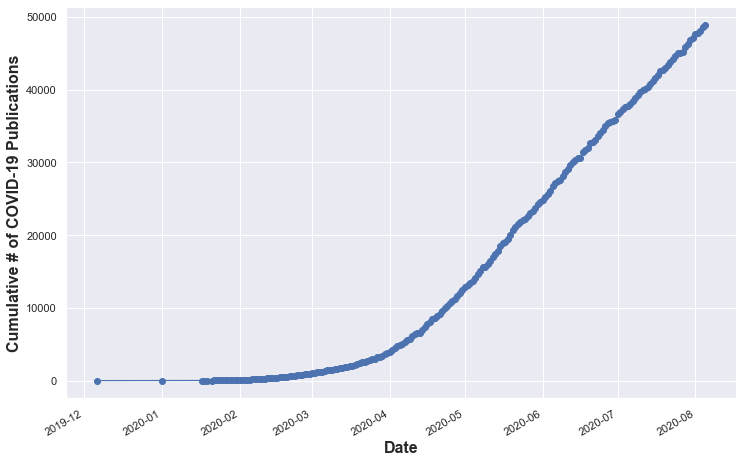

In [21]:
#### Visualize the cumulative publication number
## for time serie plotting, see https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
import seaborn as sns

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(12, 8)})

ax = n_pub_data['cum_pub'].plot(use_index = True, marker='o', linestyle='-', linewidth=1.2, backend = 'matplotlib');
ax.set_ylabel('Cumulative # of COVID-19 Publications', fontdict = {'fontsize': 16, 'fontweight': 'bold'});
ax.set_xlabel('Date', fontdict = {'fontsize': 16, 'fontweight': 'bold'});

## Fitting an exponential model to the cumulative number of publication   

To illustrate that the number of publications are growing exponentially, we fitted an exponential model to the data. The model can be described as $$NP(t) = NP(0)e^{rt}$$ where $NP(t)$ denotes the number of publications, $NP(0)$ is the initial number of publication, $r$ is the growth rate of the publication number, and $t$ is time measured in days.  

In [22]:
from scipy.optimize import curve_fit

In [23]:
n_pub_data_full = Number_Pub(pub_data_full)

#### Exponential model
def exp_model(x,N0,r):
    N = N0*np.exp(r*x)
    return N

In [24]:
#### Summary statistics 
def stat_summary(ydata,residual,best_vals):
    result = []
    ss_res = np.sum(residual**2)
    ss_tot = np.sum((ydata-np.mean(ydata))**2)
    r_squared=1-(ss_res/ss_tot)
    RSE =  np.sqrt(ss_res/(len(residual)-len(best_vals))) # Residual standard deviation or residual standard error
    result.append(r_squared)
    result.append(RSE)
    return result

In [25]:
x = np.array(range(len(n_pub_data_full.index)))
y = np.array(n_pub_data_full['cum_pub'])

c_expfit, cov_expfit = curve_fit(exp_model,x, y, p0 = [1,0.0001]) ## curve fit with estimate and covariance
R_est = np.array(exp_model(x,c_expfit[0],c_expfit[1])) ## calculate the model output given the data
res_expfit = y - exp_model(x,c_expfit[0],c_expfit[1]) ## calculate residual of the fit
stat_summary(y,res_expfit,c_expfit) ## summary statistic R^2, RSE (Residual Square Error)

[0.9527189325537349, 3516.8552103994]

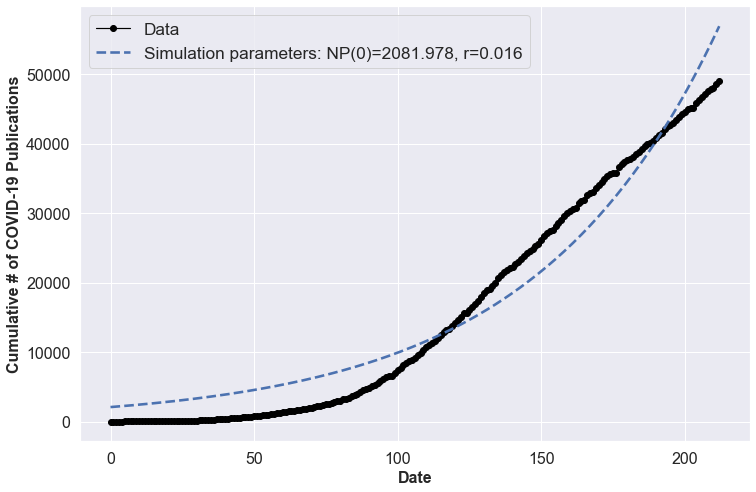

In [26]:
plt.plot(x, y, color = 'black',marker='o', linestyle='-',linewidth=1.2, label='Data')
plt.plot(x, exp_model(x, *c_expfit),'b--',linewidth=2.6, 
         label='Simulation parameters: NP(0)=%5.3f, r=%5.3f' % tuple(c_expfit))
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlabel('Date', fontdict = {'fontsize': 16, 'fontweight': 'bold'})
plt.ylabel('Cumulative # of COVID-19 Publications', fontdict = {'fontsize': 16, 'fontweight': 'bold'})
plt.legend(fontsize = 'x-large')
plt.show()

# Therapeutic data exploration

Our analysis will now focus on therapeutic data (i.e. drug or treatment related publications). We proceed first by extracting these data based on drugs key words obtained from a list provided by NIH-iCite and analysis were conducted using these articles title and abstract.

In [27]:
#### Create a function to return document title, publication year, and doi when the word belong to it

def word_finder(data, word):
    new_data = data[data['processed_text'].str.contains(word)]
    new_data = new_data.drop(['drug','device','text','language','processed_text'], axis = 1)
    new_data = new_data.rename(columns = {"kmean_pred":"cluster"})
    return new_data


In [28]:
word_finder(pub_data,'covid-19 treatment')

doi       date                  source  \
1531        10.3389/fmed.2020.00389 2020-08-01  Peer reviewed (PubMed)   
3103     10.1016/j.ejim.2020.07.017 2020-07-28  Peer reviewed (PubMed)   
5037     10.1053/j.jvca.2020.06.058 2020-07-22  Peer reviewed (PubMed)   
8781     10.1007/s11739-020-02427-8 2020-07-11  Peer reviewed (PubMed)   
10175  10.1016/j.eururo.2020.06.036 2020-07-07  Peer reviewed (PubMed)   
12317     10.1038/s41375-020-0941-7 2020-07-01  Peer reviewed (PubMed)   
16089           10.1093/jac/dkaa253 2020-06-20  Peer reviewed (PubMed)   
18707     10.1017/S1041610220001167 2020-06-12  Peer reviewed (PubMed)   
27004    10.1007/s40620-020-00743-y 2020-05-21  Peer reviewed (PubMed)   
32755    10.1186/s40779-020-00251-x 2020-05-07  Peer reviewed (PubMed)   
41632    10.1016/j.jchf.2020.04.001 2020-04-09  Peer reviewed (PubMed)   
41663    10.1007/s00204-020-02734-1 2020-04-09  Peer reviewed (PubMed)   

                                                 journal  \
1531                               Frontiers in medicine   
3103               European journal of internal medicine   
5037   Journal of cardiothoracic and vascular anesthesia   
8781                     Internal and emergency medicine   
10175                                   European urology   
12317                                           Leukemia   
16089          The Journal of antimicrobial chemotherapy   
18707                     International psychogeriatrics   
27004                              Journal of nephrology   
32755                          Military Medical Research   
41632                                JACC. Heart failure   
41663                             Archives of toxicology   

                                                   title  \
1531   Challenges in the Management of SARS-CoV2 Infe...   
3103   COVID-19 and hydroxychloroquine: Let the avail...   
5037   Pneumomediastinum in Mechanically Ventilated C...   
8781   Characteristics and outcomes of Behçet's syndr...   
10175  COVID-19-related Mortality During the First 60...   
12317  COVID-19 among fit patients with CLL treated w...   
16089  Stopping lopinavir/ritonavir in COVID-19 patie...   
18707  Coronavirus 2019 (COVID-19) outbreak and gerop...   
27004  When a nephrology ward becomes a COVID-19 ward...   
32755  Role of adjunctive treatment strategies in COV...   
41632  End-Stage Heart Failure With COVID-19: Strong ...   
41663  COVID-19 and drug-induced liver injury: a prob...   

                                                abstract  
1531   IntroductionUnderstanding the invasive process...  
3103   Dear Editor,In our recent editorial on the rol...  
5037   To the Editor:Currently, coronavirus disease 2...  
8781   Coronavirus disease 2019 (COVID-19), caused by...  
10175  The COVID-19 pandemic prompted the decision to...  
12317  To the Editor:With more than 5 million proven ...  
16089  Sir,Severe acute respiratory syndrome coronavi...  
18707  IntroductionThe coronavirus disease 2019 (COVI...  
27004  Coronavirus disease 2019 (COVID-19), caused by...  
32755  The coronavirus disease (COVID-19) pandemic ha...  
41632  A novel coronavirus (2019-nCoV) was identified...  
41663  In December 2019, a novel coronavirus, the sev...

In [29]:
#### Define a list of drug and supplements
drug_supp_list = ['angiotensin', 'hydroxychloroquine','chloroquine', 'lopinavir', 
             'ritonavir' ,'remdesivir','tocilizumab','azithromycin','heparin', 'vitamin A',
             'favipiravir', 'umifenovir', 'ribavirin', 'methylprednisolone', 'oseltamivir',
             'ivermectin', 'darunavir', 'infuvite',' anakinra', 'ibuprofen', 'nelfinavir', 
             'corticotropin', 'vasopressor', 'baricitinib', 'ascorbic', 'colchicine','suam-312', 
             'midazolam', 'alteplase', 'camostat', 'methotrexate', 'quercetin', 'sofosbuvir',
             'acetaminophen', 'povidone-iodine', 'cyclopentamine', 'cyclosporin', 'tyrosine',
             'metformin', 'dexamethasone', 'indinavir', 'saquinavir', 'clopidogrel',
             'mycophenolate', 'tacrolimus','thrombin']

In [30]:
#### Function to count the number of times a specific drug is stated in the articles

def word_count(data, drugs):
    ## data is the entire dataframe containing a column called "processed_text"
    ## drug_list is the list of all drugs and supplements
    text = data['processed_text']
    counts = {i : 0 for i in drugs} #dict()
    for article in text:
        article = re.sub('[0-9]',' ',article).strip() ## remove number and spaces
        article = article.translate(article.maketrans("", "", string.punctuation)) ## remove punctuation
        words = article.split() # split line into words
        for word in words:
            if word in drugs:
                counts[word] += 1
    return counts

In [31]:
drugs_dict = word_count(pub_data,drug_supp_list)

In [32]:
#### order the dictionary in ascending order by the frequencies
drugs_dict = sorted(drugs_dict.items(), key = lambda x: x[1], reverse = False)
#### Convert back to dictionary
drugs_dict = {drugs_dict[i][0]: drugs_dict[i][1] for i in range(0, len(drugs_dict))}

print(drugs_dict)

{'vitamin A': 0, 'infuvite': 0, ' anakinra': 0, 'suam-312': 0, 'povidone-iodine': 0, 'corticotropin': 5, 'cyclopentamine': 12, 'cyclosporin': 15, 'alteplase': 27, 'clopidogrel': 33, 'ascorbic': 35, 'indinavir': 39, 'saquinavir': 42, 'sofosbuvir': 55, 'umifenovir': 82, 'acetaminophen': 85, 'nelfinavir': 91, 'tyrosine': 91, 'midazolam': 99, 'darunavir': 103, 'mycophenolate': 108, 'tacrolimus': 114, 'camostat': 117, 'quercetin': 119, 'vasopressor': 127, 'methotrexate': 133, 'thrombin': 161, 'metformin': 169, 'ibuprofen': 200, 'baricitinib': 225, 'colchicine': 253, 'oseltamivir': 258, 'ribavirin': 279, 'dexamethasone': 299, 'ivermectin': 314, 'favipiravir': 366, 'ritonavir': 370, 'methylprednisolone': 408, 'lopinavir': 485, 'heparin': 855, 'azithromycin': 1224, 'remdesivir': 1553, 'tocilizumab': 1631, 'chloroquine': 2021, 'angiotensin': 2515, 'hydroxychloroquine': 3873}


In [33]:
#### subset the drug dictionary
drugs_dict10 = {key: value for key, value in drugs_dict.items() if value > 10}
drugs_dict20 = {key: value for key, value in drugs_dict.items() if value > 20}
drugs_dict50 = {key: value for key, value in drugs_dict.items() if value >= 50}
drugs_dict70 = {key: value for key, value in drugs_dict.items() if value >= 70}

d_dict = drugs_dict50

len(drugs_dict50)

33

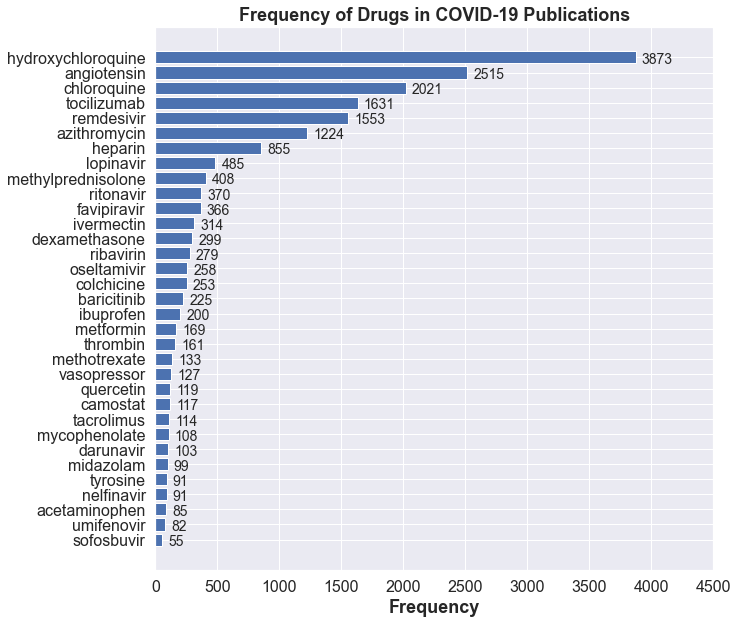

In [34]:
#### Plot drup and supplement in the manuscripts

plt.figure(figsize = (10,10))
plt.barh(range(len(d_dict)), list(d_dict.values()), align='center')
plt.xlim(0, 4500)
plt.yticks(range(len(d_dict)), list(d_dict.keys()), fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlabel('Frequency', fontsize = 18, fontweight = 'bold')
plt.title("Frequency of Drugs in COVID-19 Publications", fontdict = {'fontsize': 18, 'fontweight': 'bold'})

pos_thp =  np.arange(len(d_dict))

# Text on the top of each barplot
for i in range(len(d_dict)):
    plt.text(x = list(d_dict.values())[i] + 50, y = pos_thp[i] - 0.4 ,
             s = list(d_dict.values())[i], size = 14)
        
plt.show()

## Preparing data and constructing animation 

In what follow, we reshaped the data to a wide form in order to conduct an animation based on drug names frequency in the articles. The package bar_chart_race was used to do the animation. See [documentation](https://www.dexplo.org/bar_chart_race/) for details on how to use bar_chart_race to do animated bar chart races in Python with matplotlib and plotly. The description of how the library was constrcuted is elaborated as a blog on [medium](https://medium.com/dunder-data/create-a-bar-chart-race-animation-in-python-with-matplotlib-477ed1590096) page.

In [35]:
#### Function to transform the data to a wide dataframe for animation

def wide_data_animate(data, initial_df, drug_list):
    ## data is the entire dataframe
    ## initial_df is the initial wide dataframe containing NaN
    ## intialize empty wide dataframe
    df = initial_df
    for ii in range(0,len(df)):
        sub_data = data.loc[data['date']<=df.index[ii]]
        drug_dict = word_count(sub_data,drug_list) ## calculate the word count for each drug
        ## order the dictionary in ascending order by the frequencies
        drug_dict = sorted(drug_dict.items(), key = lambda x: x[1], reverse = False)
        ## Convert back to dictionary
        drug_dict = {drug_dict[jj][0]: drug_dict[jj][1] for jj in range(0, len(drug_dict))}
        df.iloc[ii,] = list(drug_dict.values())
    new_df = df.apply(pd.to_numeric, errors = 'ignore')
    return new_df
        

In [36]:
#### Create an empty wide  dataframe 
df = pd.DataFrame(index = n_pub_data.index, columns = list(d_dict.keys()))

#### Use the constructed function to obatin the wide dataframe
wide_th_data = wide_data_animate(pub_data, df, d_dict)

In [37]:
wide_th_data.head(2)

sofosbuvir  umifenovir  acetaminophen  nelfinavir  tyrosine  \
date                                                                      
2019-12-06           0           0              0           0         0   
2020-01-01           0           0              0           0         0   

            midazolam  darunavir  mycophenolate  tacrolimus  camostat  ...  \
date                                                                   ...   
2019-12-06          0          0              0           0         0  ...   
2020-01-01          0          0              0           0         0  ...   

            ritonavir  methylprednisolone  lopinavir  heparin  azithromycin  \
date                                                                          
2019-12-06          0                   0          0        0             0   
2020-01-01          0                   0          0        0             0   

            remdesivir  tocilizumab  chloroquine  angiotensin  \
date                                                            
2019-12-06           0            0            0            0   
2020-01-01           0            0            0            0   

            hydroxychloroquine  
date                            
2019-12-06                   0  
2020-01-01                   0  

[2 rows x 33 columns]

In [38]:
# #### write the wide dataframe as CSV to be used later
# wide_th_data.to_csv(r'wide_therapeutic_publication2.csv',header = True, index = True)

In what follow, we will import the data previously saved and create the animation.

In [39]:
import bar_chart_race as bcr

In [40]:
#### Read in the wide Covid-19 therapeutic publication data
wide_th_data = pd.read_csv('wide_therapeutic_publication2.csv')

In [41]:
#### Reformat the date
wide_th_data['date'] = pd.to_datetime(wide_th_data['date'], format = '%Y/%m/%d') # convert the date into a date format
wide_th_data = wide_th_data.sort_values(by = "date", ascending = True).reset_index(drop=True) # sort by date
wide_th_data = wide_th_data.set_index('date') ## Make the index the date column

In [42]:
# #### Save to a file as .mp4
# bcr.bar_chart_race(
#     df=wide_th_data,
#     filename='covid19_therapeutic_publication.mp4',
#     orientation='h',
#     sort='desc',
#     n_bars=None,
#     fixed_order=False,
#     fixed_max=False,
#     steps_per_period=5,
#     interpolate_period=True,
#     label_bars=True,
#     bar_size=.95,
#     period_label={'x': .98, 'y': .25, 'ha': 'right', 'va': 'center'},
#     period_fmt='%B %d, %Y',
#     period_summary_func=lambda v, r: {'x': .98, 'y': .18,
#                                       's': f'Total Frequency of Drugs: {v.sum():,.0f}',
#                                       'ha': 'right', 'size': 9, 'family': 'Courier New'},
#     perpendicular_bar_func='mean',
#     period_length=500,
#     figsize=(6, 4),
#     dpi=160,
#     cmap='dark12',
#     title="Frequency of Drug's Names in COVID-19 Publications",
#     title_size=12,
#     bar_label_size=7.5,
#     tick_label_size=7.5,
#     shared_fontdict={'family' : 'DejaVu Sans','weight' : 'bold'},
#     scale='linear',
#     writer=None,
#     fig=None,
#     bar_kwargs={'alpha': .8},
#     filter_column_colors=False)

In [43]:
#### Run in notebook by stating filename=None
bcr.bar_chart_race(
    df=wide_th_data, 
    filename=None,
    interpolate_period=True,
    period_label={'x': .97, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_fmt='%B %d, %Y',
    period_summary_func=lambda v, r: {'x': .97, 'y': .18,
                                      's': f'Total Frequency of Drugs: {v.sum():,.0f}',
                                      'ha': 'right', 'size': 9, 'family': 'Courier New'},
    perpendicular_bar_func='median',
    period_length=500,
    figsize=(6, 4),
    dpi=160,
    cmap='dark12',
    title='Frequency of Drugs in COVID-19 Publications',
    title_size=12,
    bar_label_size=7.5,
    tick_label_size=7.5,
    shared_fontdict={'family':'DejaVu Sans','weight' : 'bold'})

## Analysis of the Therapeutric data 

In [44]:
#### Function to select data containing only the drugs names

drugs50 = list(drugs_dict50.keys()) ## Drugs that were mentioned at least 50 times

def therapeutic_data(data, drugs):
    ## data is the entire dataframe 
    ## drugs is the list of all drugs and supplements
    new_data = []
    for row in tqdm(data.itertuples(index = False)):
        article = row[10]
        article = re.sub('[0-9]',' ',article).strip() ## remove number and spaces
        article = article.translate(article.maketrans("", "", string.punctuation)) ## remove punctuation
        article = article.split() ## split into words
        if any([drug in article for drug in drugs]):
            new_data.append(row)
    return pd.DataFrame(new_data).reset_index(drop=True)


In [45]:
thera_data = therapeutic_data(pub_data, drugs50)
thera_data = thera_data.drop(['device','text','language'], axis = 1) ## drop these columns

thera_data.head(2)

48937it [00:09, 5238.37it/s]


doi       date           source journal  \
0  10.21203/rs.3.rs-52214/v1 2020-08-05  Research Square     NaN   
1  10.21203/rs.3.rs-53099/v1 2020-08-05  Research Square     NaN   

                                               title  \
0  Covid-19-associated coagulopathy (CoAC): throm...   
1  Hordatines as a Potential Inhibitor of COVID-1...   

                                            abstract  \
0  Background: COVID-19 associated coagulopathy i...   
1  Total 40 natural compounds were selected to pe...   

                                                drug  \
0  Alteplase;Dimer;Prothrombin;Thrombin;Thrombopl...   
1                 Dimer;Hydrogen;Remdesivir;Tyramine   

                                      processed_text  
0  covid-19-associated coagulopathy coac): thromb...  
1  hordatines potential inhibitor main protease r...

In [46]:
thera_data.shape

(4798, 8)

Now analyzed the therapeutic data and cluster them into different categories.First we conduct a vectorization on the processed data. Vectorization is a way of converting the text into vector and hence a form the algorithm can analyzed. This procedure consist of counting the number of times each word or instances appears in a document in a matrix form.
We then used PCA and Kmeans clustering approaches to determine the number of cluster in the documents. 

### Vectorization 

In [47]:
#### Function to vectorized the therapeutic data 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 


def vectorize(text, maxx_features, ngram):
    vectorizer = TfidfVectorizer(max_features=maxx_features, ngram_range = ngram, token_pattern="(?u)\\b[\\w-]+\\b")
    X = vectorizer.fit_transform(text)
    return X

In [48]:
#### Vectorize and preprocessed the therapeutic data 

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 

## vectorize the data
text_t = thera_data['processed_text'].values
Xt = vectorize(text_t, 10000,(1,3))
print(Xt.shape)

## scaling the data to make all features comparables
scaler = StandardScaler(with_mean = False) # do not mean center before scaling 
Xt_scaled = scaler.fit_transform(Xt)

# Normalize the data so it can approximately follows a Gaussian distribution 
Xt_normalized = normalize(Xt_scaled.toarray()) 

# Convert to dataframe
Xt_normalized = pd.DataFrame(Xt_normalized)

(4798, 10000)


### Dimensionality reduction using PCA

Given that we have a very high dimension for our data (i.e. 4798 x 10000), we reduce the number of dimensions to a reasonable amount using Principacl Component Analysis. This will suppress some noise and speed up the computations later on.

In [49]:
from sklearn.decomposition import PCA
import time

start_time = time.time() # check execution time

pca = PCA(n_components=0.95, random_state=50)
Xt_principal = pca.fit_transform(Xt_normalized)
Xt_principal = pd.DataFrame(Xt_principal) 
print(Xt_principal.shape)

print("--- %s minutes ---" % round((time.time() - start_time)/60, 2))

(4798, 3469)
--- 1.66 minutes ---


### KMeans clustering 

Now we run Kmean with different K in order to determine the optimal cluster (i.e. K) in our documents. The k-means algorithm seeks to minimize distortion. From [Scipy documentation](https://docs.scipy.org/doc/scipy-0.14.0/reference/cluster.vq.html#:~:text=It%20returns%20a%20set%20of,each%20of%20the%20k%20clusters.&text=The%20k%2Dmeans%20algorithm%20tries,of%20centroids%20to%20reduce%20distortion.), distortion is defined as the sum of the squared distances between each observation vector and its dominating centroid. Each step of the k-means algorithm refines the choices of centroids to reduce distortion. The change in distortion is used as a stopping criterion: when the change is lower than a threshold, the k-means algorithm is not making sufficient progress and terminates.

In [50]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from kneed import KneeLocator
import multiprocessing

# access the number of cores on the machine
num_cores = multiprocessing.cpu_count() 

In [51]:
#### run kmeans with many different k to identify the best k using elbow method

start = 1 
limit = 34 
step = 1
distortions_t = []
K = range(start, limit, step)

start_time = time.time() # check execution time (could take about 55 min to run)

for k in tqdm(K):
    k_means = KMeans(n_clusters=k, random_state=50,max_iter = 600, tol=0.00001)
    k_means.fit(Xt_principal)
    distortions_t.append(sum(np.min(cdist(Xt_principal, k_means.cluster_centers_, 'euclidean'), axis=1)) / Xt.shape[0])

print("--- %s minutes ---" % round((time.time() - start_time)/60, 2))

100%|██████████| 33/33 [10:29<00:00, 19.06s/it]

--- 10.48 minutes ---


Now we calculate the most optimum k using the KneeLocator function. This function attempts to find the point of inflection on the curve. We plot the distorttion (the sum of squared distances from each point to its assigned center) with respect to the k and the optimum value was also plotted as a dashed line.

In [54]:
knt = KneeLocator(K, distortions_t, S = 1.0, curve = 'concave', direction='decreasing')
print(knt.knee)

33


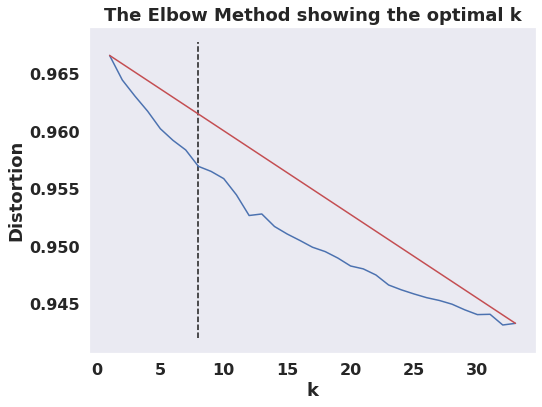

In [55]:
X_linet = [K[0], K[-1]]
Y_linet = [distortions_t[0], distortions_t[-1]]
# # Choose the knee point where the curve start to flatten
# kn = KneeLocator(K, distortions, curve='convex', direction='decreasing')

# Plot the elbow
plt.figure(figsize=(8,6))
plt.plot(K, distortions_t, 'b-')
plt.plot(X_linet, Y_linet, 'r')
plt.vlines(8, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('k', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.ylabel('Distortion', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.title('The Elbow Method showing the optimal k', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.grid()
plt.show()

In [56]:
#### Use the optimum k to predict the category for each articles
kt = 8

start_time = time.time() # check execution time

kmeans_t = KMeans(n_clusters=kt, random_state=50, max_iter = 600, tol=0.00001)
y_pred_t = kmeans_t.fit_predict(Xt_principal)
thera_data['kmean_pred'] = y_pred_t 

print("--- %s minutes ---" % round((time.time() - start_time)/60, 2))

--- 0.15 minutes ---


In [57]:
thera_data.shape

(4798, 9)

## Topic Modeling by Cluster 

### Cluters size 

In [58]:
#### Plotting the size of the k clusters

def cluster_size(data, k, ylim):
    ## data is a dataframe
    ## k is the number of cluster
    ## ylim is the end of plt.ylim (e.g. 0, 1000 would be ylim = (0,1000))
    
    cluster = range(0,k,1)
    size = []
    for ii in tqdm(cluster):
        size.append(len((data.loc[data['kmean_pred']==ii]).reset_index(drop=True)))

    ## Cluster labels    
    label = ["C-" + str(x) for x in cluster]
    ## dataframe
    cluster_data = pd.DataFrame({'label':label, 'length':size},index = cluster)
    cluster_data = cluster_data.sort_values(by=['length'], ascending = False)
    # cluster_data.plot.bar(x='label', y='length', rot=0)

    c_pos =  np.arange(len(cluster_data['length']))

    ## Plot the clusters size

    plt.figure(figsize = (14,7))
    plt.bar(c_pos, cluster_data['length'], align='center', alpha=0.5, color = 'blue', edgecolor = 'black', 
         linewidth = 1.6, tick_label = 1.6)
    plt.ylim(ylim)
    plt.xticks(c_pos,cluster_data['label'], fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.ylabel('Cluster Size', fontsize = 18, fontweight = 'bold')
    plt.title("Cluster size from Kmean analysis", fontdict = {'fontsize': 18, 'fontweight': 'bold'})

    # Text on the top of each barplot
    for i in range(len(cluster_data['length'])):
        plt.text(x = c_pos[i]-0.2 , y = list(cluster_data['length'])[i] + 50 ,
                 s = list(cluster_data['length'])[i], size = 16)
    
    plt.show()


100%|██████████| 8/8 [00:00<00:00, 999.89it/s]


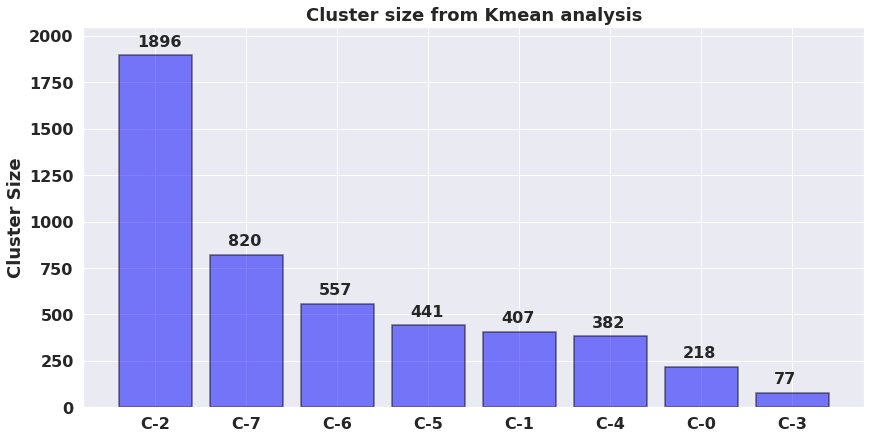

In [61]:
cluster_size(thera_data, kt,(0,2050))

In [62]:
#### Function to generate Drugs frequency in cluster

def drug_frequency_cluster(data, drugs, Cn,xlim):
    ## data is dataframe with column name "kmean_pred" which are kmean clusters
    ## drugs is a list containing several drugs
    ## Cn is cluster number
    ## xlim the range of the x-axis (e.g. (0,1000) means from 0 to 1000)
    
    sub_data = data.loc[data['kmean_pred']==Cn] ## select publication in cluster Cn
    
    
    ## Find number of drugs stated in the cluster and return the result as dictionary
    drugs_dict = word_count(sub_data,drugs)
    
    ## order the dictionary in ascending order by the frequencies
    drugs_dict = sorted(drugs_dict.items(), key = lambda x: x[1], reverse = False)
    
    #### Convert back to dictionary
    drugs_dict = {drugs_dict[i][0]: drugs_dict[i][1] for i in range(0, len(drugs_dict))}
    #xlim = (0, max(drugs_dict.values())+40)
    
    #### Plot drup and supplement in the manuscripts
    plt.figure(figsize = (10,10))
    plt.barh(range(len(drugs_dict)), list(drugs_dict.values()), align='center')
    plt.xlim(xlim)
    plt.yticks(range(len(drugs_dict)), list(drugs_dict.keys()), fontsize = 16)
    plt.xticks(fontsize = 16)
    plt.xlabel('Frequency', fontsize = 18, fontweight = 'bold')
    plt.title("Frequency of Drugs in Cluster " + str(Cn), fontdict = {'fontsize': 18, 'fontweight': 'bold'})

    pos =  np.arange(len(drugs_dict))

    # Text on the top of each barplot
    for i in range(len(drugs_dict)):
        plt.text(x = list(drugs_dict.values())[i] + 20, y = pos[i] - 0.4 ,
                 s = list(drugs_dict.values())[i], size = 16)
        
    plt.show()
    

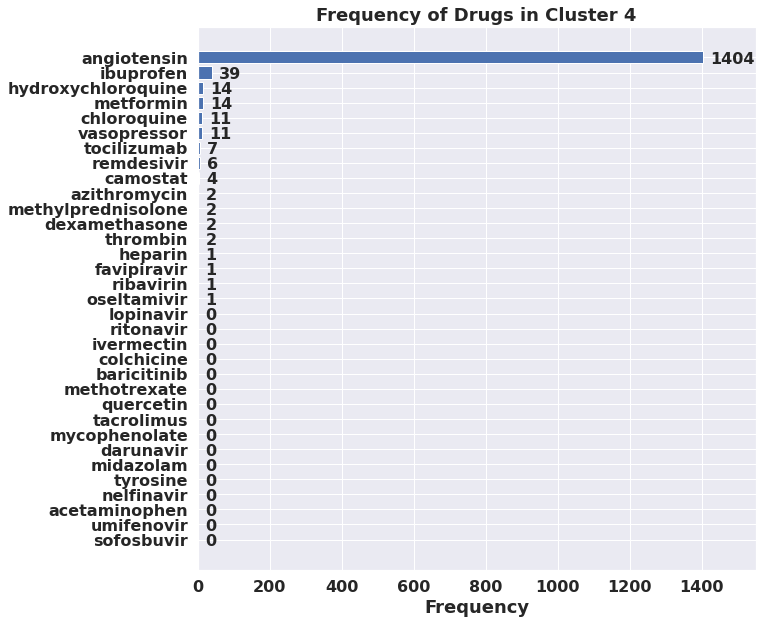

In [81]:
sub_drugs = list(d_dict.keys()) ## select the 33 drugs previously used

drug_frequency_cluster(thera_data,sub_drugs,4,(0,1550))

### Comparison of our cluster to the Therapeutic Information Browser data

It can be seen from cluster 4 that most of the documents are about the angiotensin drug. In what follow, we extracted about 131 angiotensin related papers from [Therapeutic Information Browser (TIB)](https://covidtib.c19hcc.org/app_direct/dashboard/) and compared these with papers in cluster 4.  

In [66]:
#### Read in the angiotensin related publications from the TIB portal
angiotensin_tib_data = pd.read_csv('therapeutics_evidence_angiotensin.csv')

In [67]:
#### Create a venn diagram of the TIB and cluster 4
import venn
from simple_venn import venn2, venn3, venn4

C:\Users\messanks\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\venn\_backwards_compatibility.py:30: UserWarning: `venn2()` is retained for backwards compatibility; use `venn()` instead
  warn((


Text(0.4, -0.05, "Figure: Overlap between the Cluster 4 and the Therapeutic Information Browser \n        angiotensin related publications based on article's titles")

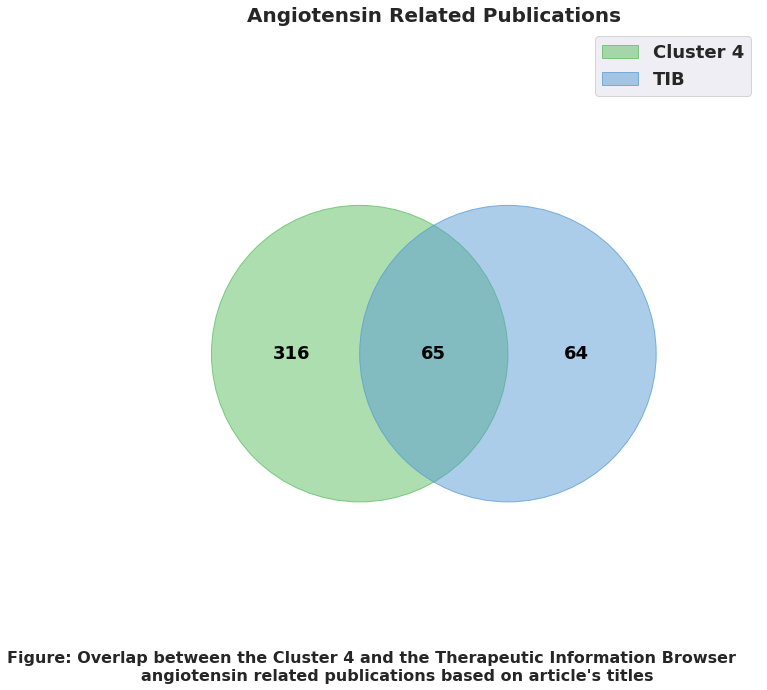

In [69]:
#### Plot the venn diagram of the two data
c4_data = thera_data.loc[thera_data['kmean_pred']==4]
c4_title = list(c4_data['title'].dropna())
tib_title = list(angiotensin_tib_data['Title'].dropna())


# labels = venn.get_labels([set(c4_doi),set(tib_doi)], fill = ['number'])
labels = venn.generate_petal_labels([set(c4_title),set(tib_title)])
fig, ax = venn.venn2(labels, names = ['Cluster 4', 'TIB'], figsize = (12,12), fontsize = 18)
ax.set_title('Angiotensin Related Publications', fontsize = 20, fontweight = 'bold')
ax.text(0.4,-0.05,
        '''Figure: Overlap between the Cluster 4 and the Therapeutic Information Browser 
        angiotensin related publications based on article's titles''', horizontalalignment='center', size = 16)

In [70]:
#### Function to vectorize the documents

from sklearn.feature_extraction.text import CountVectorizer
# nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['2019','covid','covid-19','sars-cov-2','coronavirus','sars','severe',
                   'acute','respiratory','syndrome','doi','https','novel', 'org',
                  'article','10','1016','et','al','2020','95','ci','confidence','interval', 
                  '95 ci','95 confidence interval','0','1','p','05','4','2','3','4','5','6','7','8',
                  '9'])#, 'covid-19','sars-cov-2'])

## Vectorize the documents using count vectorizer
def vectorization(data, k, max_feat):
    ## k is the total number of cluster in the dataset (obtained from Kmeans)
    ## data is the raw text data with a column specifying cluster category for each 
    ## document (denoted "kmean_pred" here). 
    ## max_feat is the maximum number of features to retain
    
    vectorizers = [] # initialize vectorizer
    
    for ii in range(0, k):
        # Creating a vectorizer
        vectorizers.append(CountVectorizer(min_df=2, max_df=1.0, stop_words=stop_words, ## term found in at least min_df doc
                                           ngram_range=(3,3), max_features = max_feat,
                                           lowercase=True, analyzer = 'word',
                                           token_pattern='(?u)\\b[\\w-]+\\b'))
    
    ## Now vectorize the data for each of our cluster obtained from Kmeans
    vectorized_data = {}

    for current_cluster, cv in tqdm(enumerate(vectorizers)):
        try:
            name = 'C' + str(current_cluster) # cluster name
            X = cv.fit_transform(data.loc[data['kmean_pred'] == current_cluster, 
                                                             'processed_text']).toarray() # transoform to an array
            colnames = cv.get_feature_names() # extract column names 
            vectorized_data[name] = pd.DataFrame(X, columns = colnames) # add colum name to the array 
        except Exception as e:
            print("Not enough token in cluster: " + str(current_cluster))
            vectorized_data[name] = None
            
    return vectorized_data


In [71]:
vectorized_texts_t = vectorization(thera_data, kt, 30)

8it [00:03,  2.31it/s]


In [72]:
#### Function to visualize instance frequency 

def wordfreq_hist(data,Cn, K):
    ## data is a 3D dictionary containing all clusters word frequency
    ## Cn is the cluster number to be inputed into the dataset (this varies from 0 to 19)
    ## K is the maximum number of cluster
    
    try:
        if Cn in range(0, K):
            c_vectorized = data["C" + str(Cn)]
            data_sum = c_vectorized.sum(axis=0)

            ## order frequency in ascending order
            data_sum.sort_values(ascending = True, inplace = True)
            name = list(data_sum.index)

            pos = np.arange(len(name))

            freq = data_sum.values

            plt.figure(figsize = (8,12))
            plt.barh(pos, freq, align='center')
            plt.yticks(pos, name, fontsize = 16)
            plt.xticks(fontsize = 16)
            plt.xlabel('Frequency', fontsize = 18, fontweight = 'bold')
            plt.title("Top 50 instances", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
            plt.show()
            
            ### print data frame of c_vectorized
#             print(c_vectorized.head(6))

        else:
            print(''' Error: You selected a cluster number %d.
            This is outside of the clusters found using Kmeans. 
            Please select a cluster in the range 0 to %d.''' %(Cn,K-1))
    except AttributeError as error:
        print('''Error: Cluster %d does not contain any instance.
        Please select a different cluster''' %Cn)
    except:
        print("Opps!!! Something else went wrong")

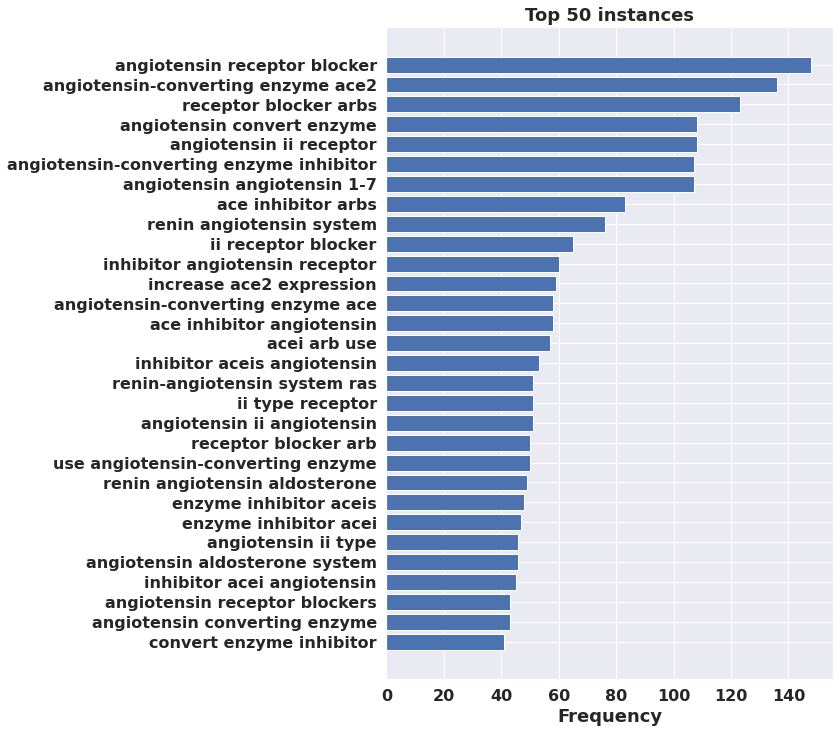

In [73]:
wordfreq_hist(vectorized_texts_t,4, kt)

## Supervised classification

As of now, we have used KMeans to classify the data into 8 categories and thus we could potentially use a supervised learning to determine how well KMeans classify the data. We will use a Stochastic Gradient Descent (SGD) approach. This is an efficient approach to fitting linear classifiers and regressors under convex loss functions. See more on SGD [here](https://scikit-learn.org/stable/modules/sgd.html#:~:text=Stochastic%20Gradient%20Descent,Vector%20Machines%20and%20Logistic%20Regression.).

In [74]:
#### function to print out classification model report

def classification_report(model_name, test, pred):
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    
    print(model_name, ":\n")
    print("Accuracy Score: ", '{:,.3f}'.format(float(accuracy_score(test, pred)) * 100), "%")
    print("     Precision: ", '{:,.3f}'.format(float(precision_score(test, pred, average='macro')) * 100), "%")
    print("        Recall: ", '{:,.3f}'.format(float(recall_score(test, pred, average='macro')) * 100), "%")
    print("      F1 score: ", '{:,.3f}'.format(float(f1_score(test, pred, average='macro')) * 100), "%")

In [75]:
#### Split the dataset into training and test sets

from sklearn.model_selection import train_test_split

## test set size of 20% of the data and the random seed 42 <3
X_train, X_test, y_train, y_test = train_test_split(Xt_principal,y_pred_t, test_size=0.2, random_state=42)

print("X_train size:", len(X_train))
print("X_test size:", len(X_test), "\n")

X_train size: 3838
X_test size: 960 



In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier

# SGD instance
sgd_clf = SGDClassifier(max_iter=10000, tol=1e-3, random_state=42, n_jobs=  num_cores - 1)
# train SGD
sgd_clf.fit(X_train, y_train)

# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=10, n_jobs=  num_cores - 1)

# print out the classification report
classification_report("Stochastic Gradient Descent Report (Training Set)", y_train, sgd_pred)

Stochastic Gradient Descent Report (Training Set) :

Accuracy Score:  91.193 %
     Precision:  93.680 %
        Recall:  89.869 %
      F1 score:  91.626 %


Here the description of each of the metrics is as follow:
* *Accuracy Score*: This is the ratio of correctly predicted observation to the total observations (calculated as TP+TN/TP+FP+FN+TN).
* *Precision*: This is is the ratio of correctly predicted positive observations to the total predicted positive observations (calculated as TP/TP+FP).
* *Recall (also known as TPR)*: This is the ratio of correctly predicted positive observations to the all observations in actual class (calculated as TP/TP+FN).
* *F1 score*: This is the weighted average of Precision and Recall and thus F1 score will only be high if both precision and recall are high (calculated as 2*(Recall * Precision) / (Recall + Precision)).

Note see [article](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/) for full description of these metrics.

In [77]:
#### We test for over-fitting by checking how the model is doing over the test set

## cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=10, n_jobs= num_cores - 1)

## print out the classification report
classification_report("Stochastic Gradient Descent Report (Training Set)", y_test, sgd_pred)

Stochastic Gradient Descent Report (Training Set) :

Accuracy Score:  85.312 %
     Precision:  91.814 %
        Recall:  78.049 %
      F1 score:  83.554 %


Now we perform the cross validation on the entire dataset and estimate score using accuracy score below. Note that by default, cross_val_score use accuracy score but this can be changed as specified in the [documentation](https://scikit-learn.org/stable/modules/cross_validation.html).

In [78]:
#### Now check how the model is doing over the entire dataset

sgd_cv_score = cross_val_score(sgd_clf, Xt_principal, y_pred_t, cv=10, n_jobs= num_cores - 1)
print("Mean Accuracy cv Score - SGD: %0.2f (+/- %0.2f) %%" % ((sgd_cv_score.mean() * 100, sgd_cv_score.std() * 100)))

Mean Accuracy cv Score - SGD: 91.41 (+/- 1.16) %
